In [11]:
import numpy as np
import pandas as pd
import joblib
from pathlib import Path
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. Auto-detect project root
# --------------------------------------------------
def find_project_root():
    here = Path.cwd()
    for p in [here] + list(here.parents):
        if (p / "dataset" / "processed").exists():
            return p
    raise FileNotFoundError("Could not find project root.")

PROJECT_ROOT = find_project_root()
print("PROJECT ROOT:", PROJECT_ROOT)

# --------------------------------------------------
# 2. Define paths
# --------------------------------------------------
PROC_DIR   = PROJECT_ROOT / "dataset" / "processed"
MODELS_DIR = PROJECT_ROOT / "models"
FIG_DIR    = PROJECT_ROOT / "results" / "figures"

X_TEST_FILE = PROC_DIR / "X_test_proc.npy"
Y_TEST_FILE = PROC_DIR / "y_test.csv"
MODEL_FILE  = MODELS_DIR / "rf_smote70_classweight.joblib"

OUTPUT_FIG  = FIG_DIR / "rf_precision_recall_curve.png"

# --------------------------------------------------
# 3. Load artefacts
# --------------------------------------------------
X_test = np.load(X_TEST_FILE)
y_test = pd.read_csv(Y_TEST_FILE).squeeze().to_numpy()
model  = joblib.load(MODEL_FILE)

print("Loaded:", X_test.shape, y_test.shape)

# --------------------------------------------------
# 4. Predict probabilities
# --------------------------------------------------
y_scores = model.predict_proba(X_test)[:, 1]

# --------------------------------------------------
# 5. Compute Precision–Recall curve
# --------------------------------------------------
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# --------------------------------------------------
# 6. Plot and SAVE (NO COLORS SPECIFIED)
# --------------------------------------------------
plt.figure(figsize=(6, 4))
plt.plot(recalls, precisions, linewidth=2)
plt.scatter(
    [rc_at_thr],
    [pr_at_thr],
    s=40,
)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid(True, linestyle="--", linewidth=0.5)

out_path = FIG_DIR / "rf_hikari_test_precision_recall_curve.png"
plt.tight_layout()
plt.savefig(out_path, dpi=300)
plt.close()

print(f"Saved Precision–Recall curve to: {out_path}")
print(f"Operating threshold ≈ {thr:.2f}, Precision={pr_at_thr:.4f}, Recall={rc_at_thr:.4f}")


PROJECT ROOT: C:\Users\user\MscCyberSecMastersProject\RF_IDS_Project
Loaded: (103784, 81) (103784,)
Saved Precision–Recall curve to: C:\Users\user\MscCyberSecMastersProject\RF_IDS_Project\results\figures\rf_hikari_test_precision_recall_curve.png
Operating threshold ≈ 0.40, Precision=0.3309, Recall=0.9989


,Class,Count,Percentage (%)
0,Benign (0),96278,92.770000
1,Attack (1),7506,7.230000


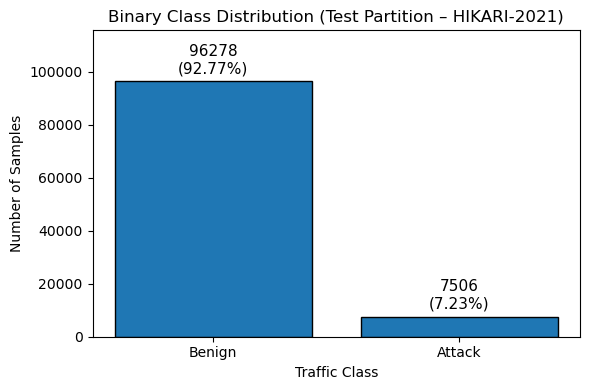

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Test-set binary class distribution ---
test_counts = pd.Series(y_test).value_counts().sort_index()
test_percent = (test_counts / test_counts.sum() * 100).round(2)

test_dist = pd.DataFrame({
    "Class": ["Benign (0)", "Attack (1)"],
    "Count": test_counts.values,
    "Percentage (%)": test_percent.values
})

display(
    test_dist.style.set_properties(**{
        'font-size': '12pt',
        'padding': '10px'
    })
)

# --- Black & White Figure for Report ---
plt.figure(figsize=(6, 4))

bars = plt.bar(
    ["Benign", "Attack"],
    test_counts.values,
    edgecolor="black",
    linewidth=1
)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 2000,   # <-- pushes text ABOVE the bar
        f"{test_counts.values[i]}\n({test_percent.values[i]}%)",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="normal"
    )

plt.xlabel("Traffic Class")
plt.ylabel("Number of Samples")
plt.title("Binary Class Distribution (Test Partition – HIKARI-2021)")

plt.ylim(0, test_counts.max() * 1.20)

plt.tight_layout()

plt.savefig("test_binary_class_distribution.png", dpi=300)
plt.show()
